In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

Data set:
https://drive.google.com/open?id=1oPpVV8A_bROfReZCQP2AfgR3zIL_WeiA

(From Kaggle)-- https://www.kaggle.com/gilsousa/habermans-survival-data-set

Description:-
https://drive.google.com/open?id=1ee_Ux01UTqZOGQG4GP_FDDhUKWXj1-PF

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

### Analyse the above linked dataset as like iris data.

In [5]:
haberman=pd.read_csv('haberman.csv')
haberman

,age,year,nodes,survive
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [6]:
haberman.describe()

,age,year,nodes,survive
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
haberman['survive'].unique()

array([1, 2], dtype=int64)

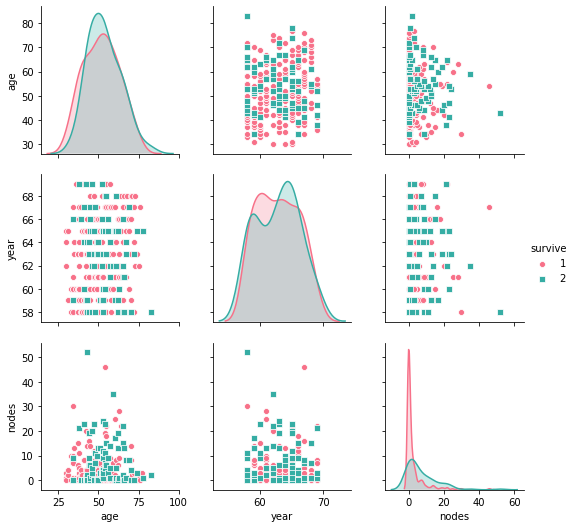

In [8]:
sns.pairplot(haberman,vars = haberman.columns[:-1],hue='survive',palette="husl",markers=["o", "s"])

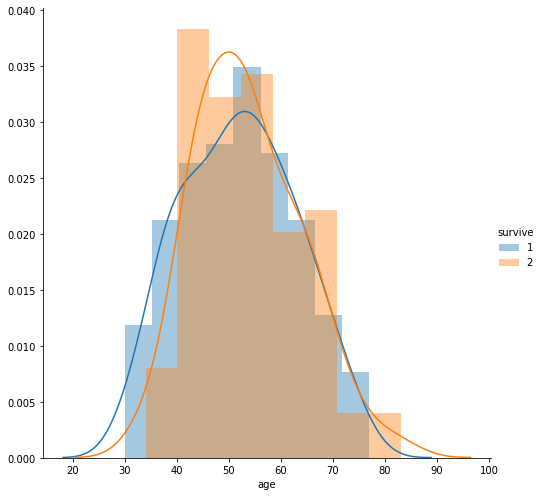

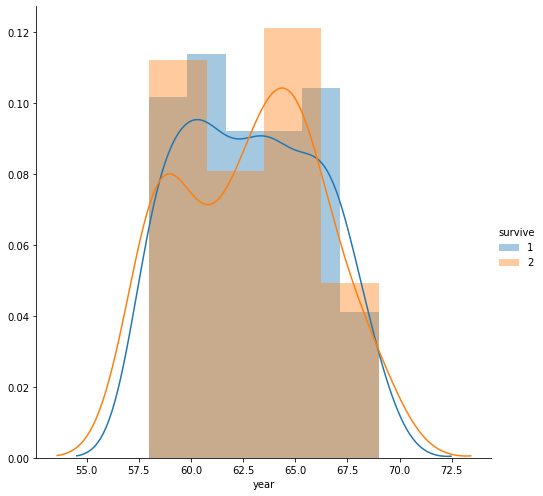

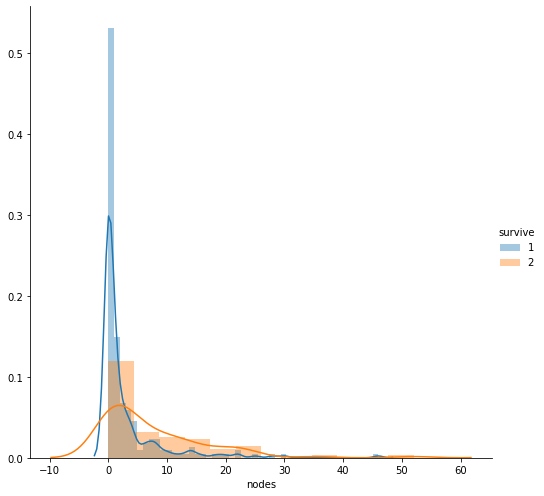

In [9]:
sns.FacetGrid(haberman,hue='survive',height=7).map(sns.distplot,'age').add_legend()
sns.FacetGrid(haberman,hue='survive',height=7).map(sns.distplot,'year').add_legend()
sns.FacetGrid(haberman,hue='survive',height=7).map(sns.distplot,'nodes').add_legend()

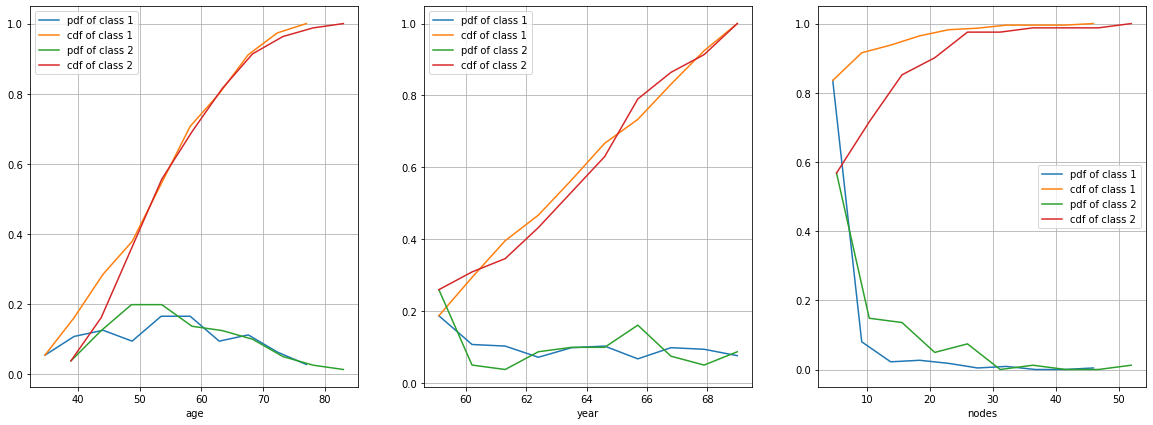

In [10]:
# PDF CDF

one = haberman.loc[haberman['survive'] == 1]
two = haberman.loc[haberman['survive'] == 2]

plt.figure(figsize=(20,7))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    
    plt.subplot(1,3, idx+1)
    label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
    
    counts1, bin_edges1 = np.histogram(one[feature], bins=10, density=True)
    pdf1 = counts1/sum(counts1)
    cdf1 = cum_sum(pdf1)
    
    counts2, bin_edges2 = np.histogram(two[feature], bins=10, density=True)
    pdf2 = counts2/sum(counts2)
    cdf2 = cum_sum(pdf2)

    plt.plot(bin_edges1[1:], pdf1, bin_edges1[1:], cdf1,bin_edges2[1:], pdf2, bin_edges2[1:], cdf2)
    
    plt.xlabel(feature)
    plt.legend(label)
    plt.grid()

In [11]:
# There are too much overlapping in the data-points and hence it is very diffucult to build a model to predict mortality beyond the 5 year pont.

AxesSubplot(0.125,0.125;0.227941x0.755)


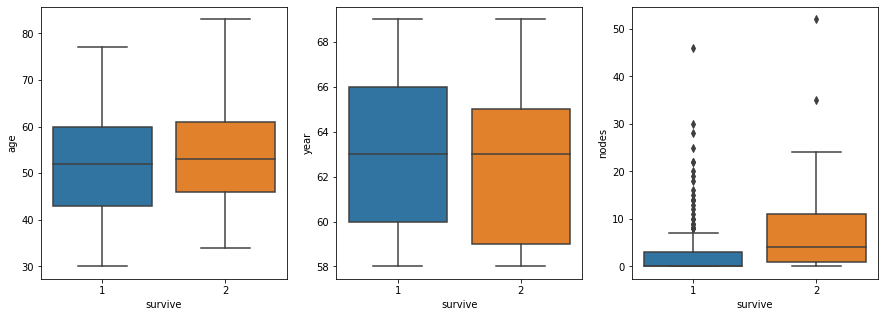

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
print(axes[0])
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.boxplot( x='survive', y=feature, data=haberman, ax=axes[idx])
plt.show()  

In [13]:
# nodes has a lot of outliars

Q1-- Plot Histogram for all fearutes of the data set and write comments on which feature is best for predicting survival status.

(Hint: Use same process as did in iris data set.)

In [14]:
#Write your code here for ploting--

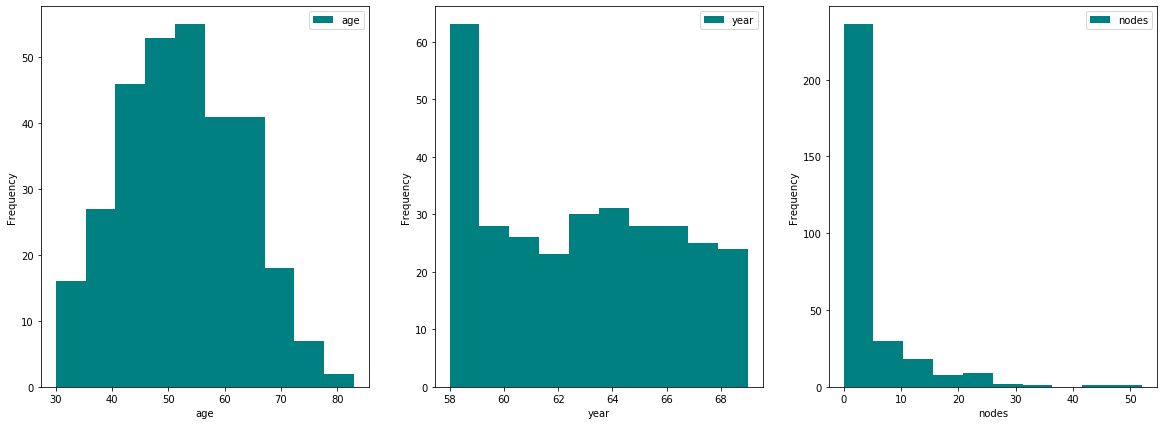

In [15]:

plt.figure(figsize=(20,7))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    
    plt.hist( haberman[feature],label=feature,color='teal')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
plt.show()  

In [16]:
# Write your comments here--

In [ ]:
# 1. The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
# 2. There are too much overlapping in the data-points and hence it is very diffucult to build a model to predict mortality      beyond the 5 year pont. The given dataset is not linearly seprable form each class.
# 3. we can not build simple model using only if else condition because of the overlapping.

Q2-- On the ipl wala dataset create a function which will accept a batsman name and 1 interger value and returns the number of runs he has after those many matches

E.g Input (V Kohli, 18)

Output - 678(Runs scored by Virat Kohli after 18 matches

In [18]:
# Give your comments here

In [19]:
delivery=pd.read_csv("deliveries.csv")

In [20]:
def batsman_runs_after(batsman,matches=0):
    print( delivery[delivery['batsman']==batsman].groupby('match_id').sum()['batsman_runs'].reset_index().iloc[0:matches].sum()['batsman_runs'], 'runs scored by',batsman,'after',matches,'matches' )

In [21]:
batsman_runs_after('V Kohli',18)

401 runs scored by V Kohli after 18 matches


In [22]:
batsman_runs_after('DA Warner',25)

1007 runs scored by DA Warner after 25 matches


In [23]:
batsman_runs_after('MS Dhoni',20)

462 runs scored by MS Dhoni after 20 matches


Q3: Write a function which will plot the match wise scores of two batsman in the form of a PDF, check this [image](https://drive.google.com/open?id=18y9DiuVvNZ3p5LIBv-eaDVxNtXrI7hp9)
<img src=""/>

In [24]:
def plot_scores(batsman1,batsman2):
    df=delivery[(delivery['batsman']=='V Kohli') | (delivery['batsman']=='DA Warner')]
    df=df.groupby(['batsman','match_id']).sum().reset_index()
    
    sns.FacetGrid(df,hue='batsman',height=7).map(sns.distplot,'batsman_runs').add_legend()
    plt.xlabel('Runs Scored')
    plt.show()

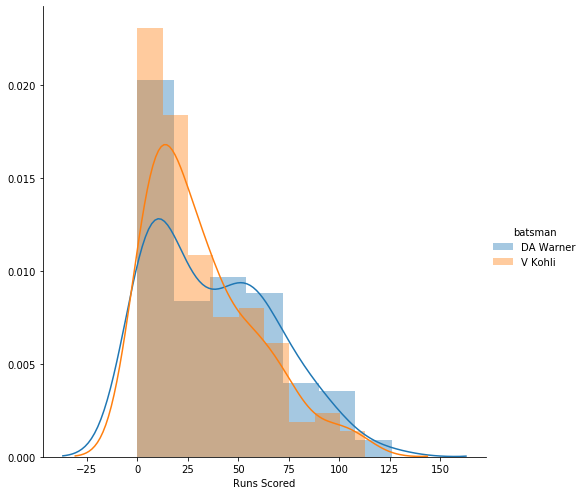

In [25]:
plot_scores('V Kohli','DA Warner')

Q4-- Write a function which will take a list as input and in return plot PDF and CDF curve as like in IRIS one.

     (you have to write your on logic for np.cumsum()--(cummulative sum- function) )

In [26]:
# Write your code here--

In [27]:
def cum_sum(l):
    
    cumsum=[l[0]]
    for i in l[1:]:
        cumsum.append( cumsum[-1] + i )
    
    return cumsum

In [28]:
def plot_pdf_cdf(l,bin_count=10):
    
    counts,bin_edges=np.histogram(l,bins=bin_count)

    pdf=counts/sum(counts)
    cdf=cum_sum(pdf)
    
    plt.plot(bin_edges[1:],pdf,label='pdf')
    plt.plot(bin_edges[1:],cdf,label='cdf')
    plt.legend()
    plt.show()

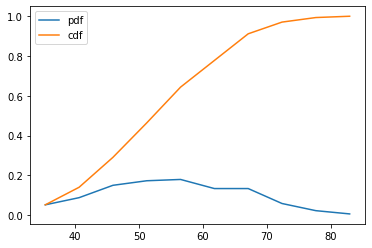

In [40]:
plot_pdf_cdf(haberman['age'])

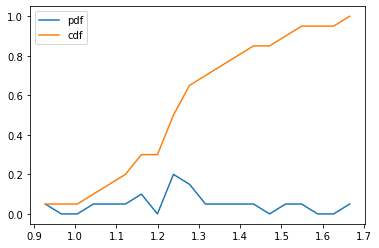

In [29]:
# avg runs in each over
plot_pdf_cdf(delivery.groupby('over').mean()['batsman_runs'],20)

In [30]:
iris=pd.read_csv('Iris.csv')

In [31]:
setosa=iris[iris['Species']=='Iris-setosa']

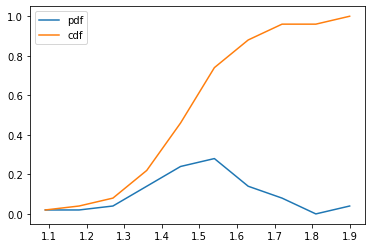

In [32]:
plot_pdf_cdf(setosa['PetalLengthCm'])